# Plotting Redbox

A place to draw the root graph as it exists in code.

In [1]:
%load_ext autoreload

%aimport redbox
from redbox.app import Redbox
from pathlib import Path
from dotenv import load_dotenv
_ = load_dotenv(Path.cwd().parent / ".env")

app = Redbox()

/Users/mark.dunne/src/idot/redbox/redbox-core/.venv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in LLMCallMetadata has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
INFO:elastic_transport.transport:HEAD http://localhost:9200/_alias/redbox-data-chunk-current [status:200 duration:0.005s]


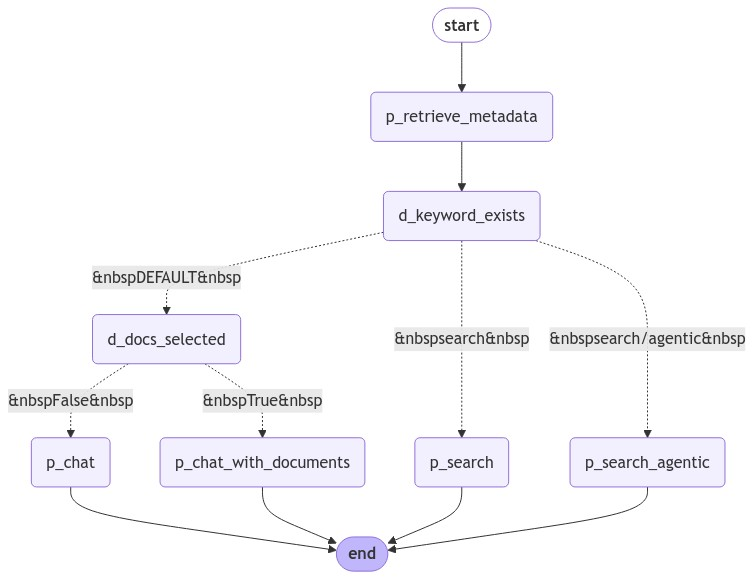

In [3]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.graph.get_graph(xray=False).draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [10]:
app.graph.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'pydantic.v1.main.LangGraphInput'>, metadata=None), 'p_search': Node(id='p_search', name='p_search', data=<langgraph.graph.state.CompiledStateGraph object at 0x146214860>, metadata=None), 'p_search_agentic': Node(id='p_search_agentic', name='p_search_agentic', data=<langgraph.graph.state.CompiledStateGraph object at 0x146215130>, metadata=None), 'p_chat': Node(id='p_chat', name='p_chat', data=<langgraph.graph.state.CompiledStateGraph object at 0x1450d5b50>, metadata=None), 'p_chat_with_documents': Node(id='p_chat_with_documents', name='p_chat_with_documents', data=<langgraph.graph.state.CompiledStateGraph object at 0x146f19670>, metadata=None), 'p_retrieve_metadata': Node(id='p_retrieve_metadata', name='p_retrieve_metadata', data=<langgraph.graph.state.CompiledStateGraph object at 0x146217290>, metadata=None), 'd_keyword_exists': Node(id='d_keyword_exists', name='d_keyword_exists', data=d_keyword_exists(func_a

In [11]:
app.graph.get_graph??

Signature:
app.graph.get_graph(
    config: Optional[langchain_core.runnables.config.RunnableConfig] = None,
    *,
    xray: Union[int, bool] = False,
) -> langchain_core.runnables.graph.Graph
Source:   
    def get_graph(
        self,
        config: Optional[RunnableConfig] = None,
        *,
        xray: Union[int, bool] = False,
    ) -> DrawableGraph:
        """Returns a drawable representation of the computation graph."""
        graph = DrawableGraph()
        start_nodes: dict[str, DrawableNode] = {
            START: graph.add_node(self.get_input_schema(config), START)
        }
        end_nodes: dict[str, DrawableNode] = {}
        if xray:
            subgraphs = dict(self.get_subgraphs())
        else:
            subgraphs = {}

        def add_edge(
            start: str, end: str, label: Optional[str] = None, conditional: bool = False
        ) -> None:
            if end == END and END not in end_nodes:
                end_nodes[END] = graph.add_node(self.get_outp